In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


sin = np.sin
cos = np.cos
pi  = np.pi
arr = np.array


def circle(c, r, n, ang=2*pi):
    '''
    Gets coordinates of circle, radius and number of points
    Return set of points
    '''
    a = np.linspace(0, ang, n, endpoint=False)
    points = c * np.ones([n, 2]) + r * arr([cos(a), sin(a)]).transpose()
    
    return points 


def spoil(points, error):
    '''
    Gets points and add noize limited by "error"
    Return spoiled set
    '''
    rand_err = 2*np.random.rand(n, 2)-1
    
    spoiled = points + err * rand_err
    
    return  spoiled

def circle_lstsq(points):
    '''
    Gets points of spoiled circle 
    Returns radius, and coordinates of the center
    '''
    x = points.transpose()[0]
    y = points.transpose()[1]
    
    X2 = np.sum(x*x)
    Y2 = np.sum(y*y)
    X  = np.sum(x)
    Y  = np.sum(y)
    XY = np.sum(y*x)

    X3  = np.sum(x*x*x)
    Y3  = np.sum(y*y*y)
    XY2 = np.sum(x*y*y)
    X2Y = np.sum(x*x*y)

    N11 = 2 * (X2 - 1/n * X**2)
    N12 = 2 * (XY - 1/n * X*Y)
    N21 = 2 * (XY - 1/n * X*Y)
    N22 = 2 * (Y2 - 1/n * Y**2)

    W1 = X3 + XY2 - 1/n * X * (X2 + Y2)
    W2 = Y3 + X2Y - 1/n * Y * (X2 + Y2)

    N = arr([[N11, N12], [N21, N22]])
    W = arr([W1, W2])

    C = np.linalg.solve(N, W)
    R2 = C[0]**2 + C[1]**2 + 1/n * (X2 + Y2 - 2 * (C[0] * X + C[1] * Y))
    R = np.sqrt(R2)
    
    return C, R



100 [100 100]

91.6 [107.8 103.6]


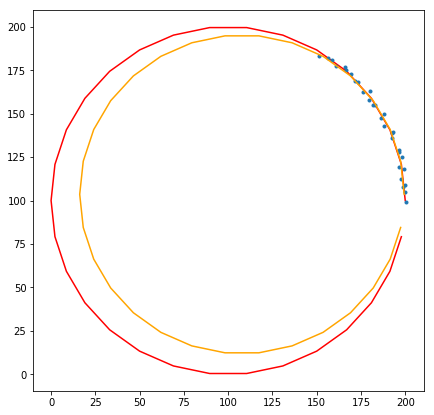

In [8]:
n = 30

r   = 100
c   = arr([100, 100])
err = r / 50


perfect = circle(c, r, n)
part    = circle(c, r, n, ang=60/180*pi)
spoiled = spoil(part, err)

C, R = circle_lstsq(spoiled)
calculated = circle(C, R, n)


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7, 7)

def plt_circle(points, color=None):
    plt.plot(points.transpose()[0], points.transpose()[1], color)
    
plt_circle(perfect, 'red')
plt_circle(spoiled, '.')
plt_circle(calculated, 'orange')

print (r, c)
print ()
print (np.round(R, 1), np.around(C, 1))

plt.show()

In [13]:
print (len(spoiled))

30


In [273]:
'''import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook

fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')

Y = perfect.T[0]
X = np.zeros(Y.shape)
Z = perfect.T[1]

ax.plot(X, Y, Z, label='parametric curve')
ax.plot(np.zeros(calculated.T[0].shape), calculated.T[0], calculated.T[1], label='parametric curve')
ax.plot(np.zeros(spoiled.T[0].shape), spoiled.T[0], spoiled.T[1], 'o')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

plt.show()
'''


"import numpy as np\nfrom mpl_toolkits.mplot3d import Axes3D\nimport matplotlib.pyplot as plt\n\n%matplotlib notebook\n\nfig = plt.figure(figsize=(7, 7))\nax = fig.gca(projection='3d')\n\nY = perfect.T[0]\nX = np.zeros(Y.shape)\nZ = perfect.T[1]\n\nax.plot(X, Y, Z, label='parametric curve')\nax.plot(np.zeros(calculated.T[0].shape), calculated.T[0], calculated.T[1], label='parametric curve')\nax.plot(np.zeros(spoiled.T[0].shape), spoiled.T[0], spoiled.T[1], 'o')\nax.set_xlabel('x axis')\nax.set_ylabel('y axis')\nax.set_zlabel('z axis')\n\nplt.show()\n"

In [6]:
print (perfect)

[[200.         100.        ]
 [197.81476007 120.79116908]
 [191.35454576 140.67366431]
 [180.90169944 158.77852523]
 [166.91306064 174.31448255]
 [150.         186.60254038]
 [130.90169944 195.10565163]
 [110.45284633 199.45218954]
 [ 89.54715367 199.45218954]
 [ 69.09830056 195.10565163]
 [ 50.         186.60254038]
 [ 33.08693936 174.31448255]
 [ 19.09830056 158.77852523]
 [  8.64545424 140.67366431]
 [  2.18523993 120.79116908]
 [  0.         100.        ]
 [  2.18523993  79.20883092]
 [  8.64545424  59.32633569]
 [ 19.09830056  41.22147477]
 [ 33.08693936  25.68551745]
 [ 50.          13.39745962]
 [ 69.09830056   4.89434837]
 [ 89.54715367   0.54781046]
 [110.45284633   0.54781046]
 [130.90169944   4.89434837]
 [150.          13.39745962]
 [166.91306064  25.68551745]
 [180.90169944  41.22147477]
 [191.35454576  59.32633569]
 [197.81476007  79.20883092]]
